In [14]:
import matplotlib.pyplot as plt
import pickle as pk
import numpy as np
from collections import defaultdict
from res_manager import ResultManager

In [2]:
rm = ResultManager('evaluation_results')

In [3]:
rm.print_meta_info()

+---------+----------------------------------+--------------+-------------+----------+
| Data ID |               Name               |    Topic     |     Type    | Versions |
+---------+----------------------------------+--------------+-------------+----------+
|    1    |   Robustness_JPEG_InceptionV3    |   Dataset    | defaultdict |    1     |
|    2    |   Performance_JPEG_InceptionV3   | Performance  | defaultdict |    1     |
|    3    |    Banchmark_JPEG_InceptionV3    |  Banchmark   | defaultdict |    1     |
|    4    |     Banchmark_JPEG_ResNet50      |  Banchmark   | defaultdict |    2     |
|    5    |     Robustness_JPEG_ResNet50     |   Dataset    | defaultdict |    1     |
|    6    |  train_evaluate_baidu_imagenet   |  AgentTrain  | defaultdict |    1     |
|    7    |     evaluate_baidu_imagenet      |  AgentTrain  | defaultdict |    1     |
|    8    |      train_facepp_imagenet       |  AgentTrain  | defaultdict |    1     |
|    9    |     evaluate_facepp_imagenet   

In [4]:
baidu_evallog = rm.load(7)
facepp_evallog = rm.load(9)
amazon_evallog = rm.load(15)

In [15]:
len(baidu_evallog['action'])

1200

In [23]:
# save log
with open('choice_cloud/baidu_actions.defaultdict', 'wb') as f:
    pk.dump(baidu_evallog,f)
with open('choice_cloud/facepp_actions.defaultdict', 'wb') as f:
    pk.dump(facepp_evallog,f)
with open('choice_cloud/amazon_actions.defaultdict', 'wb') as f:
    pk.dump(amazon_evallog,f)

In [24]:
# open log
with open('choice_cloud/baidu_actions.defaultdict', 'rb') as f:
    baidu_log = pk.load(f)

In [46]:
print(baidu_evallog['action'].count(95))
print(facepp_evallog['action'].count(95))
amazon_evallog['action'].count(95)

0
0


0

In [98]:
print("baidu maen ",np.mean(baidu_evallog['action']),"std ",np.std(baidu_evallog['action']))
print("facep maen ",np.mean(facepp_evallog['action']),"std ",np.std(facepp_evallog['action']))
print("amazon maen ",np.mean(amazon_evallog['action']),"std ",np.std(amazon_evallog['action']))

baidu maen  31.05 std  19.02360375954041
facep maen  23.483333333333334 std  16.223431271535077
amazon maen  28.341666666666665 std  18.209427884721936


In [113]:
def change(baidu_evallog):
    FLIR_actions = baidu_evallog['action']
    # FLIR_actions = facepp_evallog['action']
    # FLIR_actions = amazon_evallog['action']
    FLIR_actions1 = FLIR_actions
    FLIR_actions = np.array(FLIR_actions)
    FLIR_actions[FLIR_actions==85] = 95
    FLIR_actions[FLIR_actions==75] = 85
    FLIR_actions[FLIR_actions==65] = 75
    FLIR_actions[FLIR_actions==55] = 65
    FLIR_actions[FLIR_actions==45] = 55
    print("FLIR avg",np.mean(FLIR_actions))
    print("FLIR std",np.std(FLIR_actions))

In [114]:
change(baidu_evallog)
change(facepp_evallog)
change(amazon_evallog)

FLIR avg 33.46666666666667
FLIR std 22.777523033805842
FLIR avg 24.758333333333333
FLIR std 19.192661719753435
FLIR avg 31.608333333333334
FLIR std 22.46656620897422


In [109]:
FLIR_actions==85

array([False, False, False, ..., False, False, False])

In [110]:
type(FLIR_actions)

numpy.ndarray

In [112]:
[list(FLIR_actions).count(i) for i in np.arange(5, 105, 10)]

[47, 395, 260, 213, 0, 81, 52, 90, 43, 19]

In [45]:
[baidu_evallog['action'].count(i) for i in np.arange(5, 105, 10)]

[48, 395, 260, 213, 81, 51, 90, 43, 19, 0]

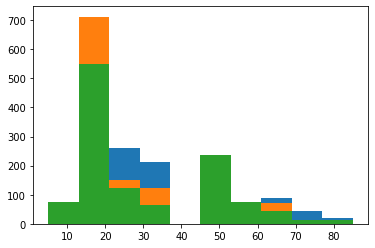

In [5]:
baidu_actions = plt.hist(baidu_evallog['action'], bins=10)
facepp_actions = plt.hist(facepp_evallog['action'], bins=10)
amazon_actions = plt.hist(amazon_evallog['action'], bins=10)

In [39]:
baidu_actions 

(array([ 48., 395., 260., 213.,   0.,  81.,  51.,  90.,  43.,  19.]),
 array([ 5., 13., 21., 29., 37., 45., 53., 61., 69., 77., 85.]),
 <a list of 10 Patch objects>)

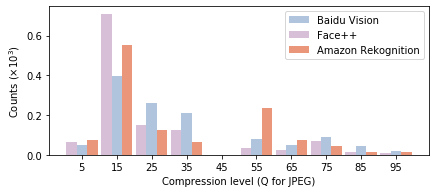

In [7]:
plt.bar([i for i in np.arange(5, 105, 10)], np.array(baidu_actions[0]) / 1000, width=3, label='Baidu Vision', color='lightsteelblue')
plt.bar([i - 3 for i in np.arange(5, 105, 10)], np.array(facepp_actions[0]) / 1000, width=3, label='Face++', color='thistle')
plt.bar([i + 3 for i in np.arange(5, 105, 10)], np.array(amazon_actions[0]) / 1000, width=3, label='Amazon Rekognition', color='darksalmon')
plt.xlabel("Compression level (Q for JPEG)")
plt.ylabel(r"Counts ($\times10^3$)")
plt.xticks([i for i in np.arange(5, 105, 10)])
plt.legend()

# plt.subplots_adjust(top=1.0,
#                     bottom=0.235,
#                     left=0.115,
#                     right=0.995,
#                     hspace=0.2,
#                     wspace=0.2)
plt.subplots_adjust(top=0.75,
                    bottom=0.235,
                    left=0.115,
                    right=0.995,
                    hspace=0.2,
                    wspace=0.2)

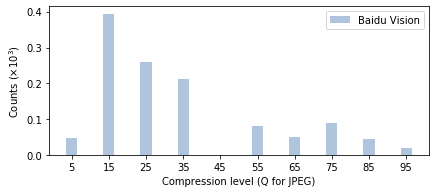

In [50]:
plt.bar([i for i in np.arange(5, 105, 10)], np.array(baidu_actions[0]) / 1000, width=3, label='Baidu Vision', color='lightsteelblue')
#plt.bar([i - 3 for i in np.arange(5, 105, 10)], np.array(facepp_actions[0]) / 1000, width=3, label='Face++', color='thistle')
#plt.bar([i + 3 for i in np.arange(5, 105, 10)], np.array(amazon_actions[0]) / 1000, width=3, label='Amazon Rekognition', color='darksalmon')
plt.xlabel("Compression level (Q for JPEG)")
plt.ylabel(r"Counts ($\times10^3$)")
plt.xticks([i for i in np.arange(5, 105, 10)])
plt.legend()

# plt.subplots_adjust(top=1.0,
#                     bottom=0.235,
#                     left=0.115,
#                     right=0.995,
#                     hspace=0.2,
#                     wspace=0.2)
plt.subplots_adjust(top=0.75,
                    bottom=0.235,
                    left=0.115,
                    right=0.995,
                    hspace=0.2,
                    wspace=0.2)

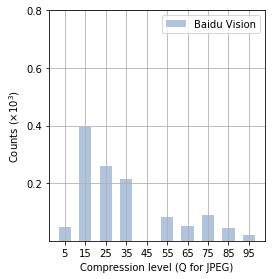

In [89]:
plt.bar([i for i in np.arange(5, 105, 10)], np.array(baidu_actions[0]) / 1000, width=6, label='Baidu Vision', color='lightsteelblue')
#plt.bar([i - 3 for i in np.arange(5, 105, 10)], np.array(facepp_actions[0]) / 1000, width=3, label='Face++', color='thistle')
#plt.bar([i + 3 for i in np.arange(5, 105, 10)], np.array(amazon_actions[0]) / 1000, width=3, label='Amazon Rekognition', color='darksalmon')
plt.xlabel("Compression level (Q for JPEG)")
plt.ylabel(r"Counts ($\times10^3$)")
plt.xticks([i for i in np.arange(5, 105, 10)])
plt.yticks([i for i in np.arange(0.2, 1 ,0.2)])
plt.grid()
plt.legend()

plt.subplots_adjust(left=0, bottom=0, right=0.5, top=0.8, hspace=0.2, wspace=0.3)
plt.savefig("AdaCompress-master/src/figure_result/ImageNet_Baidu_choices1.pdf",bbox_inches = 'tight')

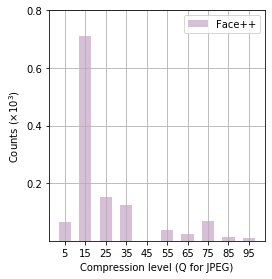

In [88]:
#plt.bar([i for i in np.arange(5, 105, 10)], np.array(baidu_actions[0]) / 1000, width=4, label='Baidu Vision', color='lightsteelblue')
plt.bar([i for i in np.arange(5, 105, 10)], np.array(facepp_actions[0]) / 1000, width=6, label='Face++', color='thistle')
#plt.bar([i + 3 for i in np.arange(5, 105, 10)], np.array(amazon_actions[0]) / 1000, width=3, label='Amazon Rekognition', color='darksalmon')
plt.xlabel("Compression level (Q for JPEG)")
plt.ylabel(r"Counts ($\times10^3$)")
plt.xticks([i for i in np.arange(5, 105, 10)])
plt.yticks([i for i in np.arange(0.2, 1 ,0.2)])
plt.grid()
plt.legend()

plt.subplots_adjust(left=0, bottom=0, right=0.5, top=0.8, hspace=0.2, wspace=0.3)
plt.savefig("AdaCompress-master/src/figure_result/ImageNet_Facepp_choices1.pdf",bbox_inches = 'tight')

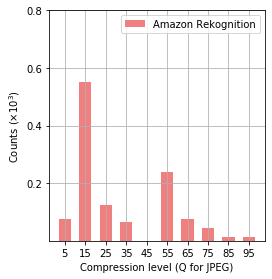

In [87]:
#plt.bar([i for i in np.arange(5, 105, 10)], np.array(baidu_actions[0]) / 1000, width=4, label='Baidu Vision', color='lightsteelblue')
#plt.bar([i - 3 for i in np.arange(5, 105, 10)], np.array(facepp_actions[0]) / 1000, width=3, label='Face++', color='thistle')
plt.bar([i for i in np.arange(5, 105, 10)], np.array(amazon_actions[0]) / 1000, width=6, label='Amazon Rekognition', color='LightCoral')
plt.xlabel("Compression level (Q for JPEG)")
plt.ylabel(r"Counts ($\times10^3$)")
plt.xticks([i for i in np.arange(5, 105, 10)])
plt.yticks([i for i in np.arange(0.2, 1 ,0.2)])
plt.grid()
plt.legend()

plt.subplots_adjust(left=0, bottom=0, right=0.5, top=0.8, hspace=0.2, wspace=0.3)
plt.savefig("AdaCompress-master/src/figure_result/ImageNet_Amazon_choices1.pdf",bbox_inches = 'tight')

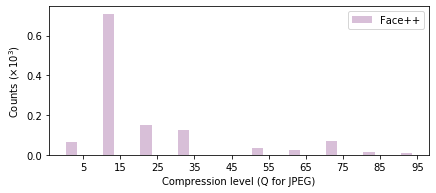

In [48]:
#plt.bar([i for i in np.arange(5, 105, 10)], np.array(baidu_actions[0]) / 1000, width=3, label='Baidu Vision', color='lightsteelblue')
plt.bar([i - 3 for i in np.arange(5, 105, 10)], np.array(facepp_actions[0]) / 1000, width=3, label='Face++', color='thistle')
#plt.bar([i + 3 for i in np.arange(5, 105, 10)], np.array(amazon_actions[0]) / 1000, width=3, label='Amazon Rekognition', color='darksalmon')
plt.xlabel("Compression level (Q for JPEG)")
plt.ylabel(r"Counts ($\times10^3$)")
plt.xticks([i for i in np.arange(5, 105, 10)])
plt.legend()

# plt.subplots_adjust(top=1.0,
#                     bottom=0.235,
#                     left=0.115,
#                     right=0.995,
#                     hspace=0.2,
#                     wspace=0.2)
plt.subplots_adjust(top=0.75,
                    bottom=0.235,
                    left=0.115,
                    right=0.995,
                    hspace=0.2,
                    wspace=0.2)

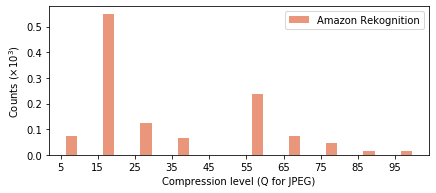

In [49]:
#plt.bar([i for i in np.arange(5, 105, 10)], np.array(baidu_actions[0]) / 1000, width=3, label='Baidu Vision', color='lightsteelblue')
#plt.bar([i - 3 for i in np.arange(5, 105, 10)], np.array(facepp_actions[0]) / 1000, width=3, label='Face++', color='thistle')
plt.bar([i + 3 for i in np.arange(5, 105, 10)], np.array(amazon_actions[0]) / 1000, width=3, label='Amazon Rekognition', color='darksalmon')
plt.xlabel("Compression level (Q for JPEG)")
plt.ylabel(r"Counts ($\times10^3$)")
plt.xticks([i for i in np.arange(5, 105, 10)])
plt.legend()

# plt.subplots_adjust(top=1.0,
#                     bottom=0.235,
#                     left=0.115,
#                     right=0.995,
#                     hspace=0.2,
#                     wspace=0.2)
plt.subplots_adjust(top=0.75,
                    bottom=0.235,
                    left=0.115,
                    right=0.995,
                    hspace=0.2,
                    wspace=0.2)